# Chapter 4: Optimisation

**Mathematics for Machine Learning (2025)**
Teaching Team

Lecturers: 
- Eleonora Giunchiglia (Department of Electrical and Electronic Engineering)
- Felipe Tobar (Department of Mathematics)

Graduate Teaching Assistants (GTAs)
- Camilo Carvajal Reyes (Department of Mathematics)
- Joshua Ong (Department of Electrical and Electronic Engineering)

## Optimisation examples

### 1. Linear regression

\begin{align}
  f \colon \R^M &\to \mathbb{R} \nonumber\\
  x &\mapsto f(x)=a^\top x + b,\quad a\in\mathbb{R}^M,b\in\mathbb{R}
\end{align}

conditional to a set of observations

\begin{equation}
	\mathcal{D} =\{(x_i,y_i)\}_{i=1}^N\subset \mathbb{R}^M \times \mathbb{R}.
\end{equation}
 Using least squares, the function $f$ is chosen via minimisation of the sum of the square differences between observations $\{y_i\}_{i=1}^N$ and predictions $\{f(x_i)\}_{i=1}^N$. That is, we aim to minimise he loss:
\begin{equation}
	J(\mathcal{D},f) = \sum_{i=1}^N(y_i-f(x_i))^2 = \sum_{i=1}^N(y_i-a^
	\top x_i - b)^2.
\end{equation}

In [1]:
# Loading data
import numpy as np

data = np.loadtxt('./data/crickets.csv', delimiter=',')

X = data[:, 0]
Y = data[:, 1]

In [2]:
# adding ones to X
X_tilda = np.vstack((X, np.ones(len(X))))
# inverse
XX_inv = np.linalg.inv(X_tilda.dot(X_tilda.T))
# optimal weights
w_opt = Y.dot(X_tilda.T).dot(XX_inv)

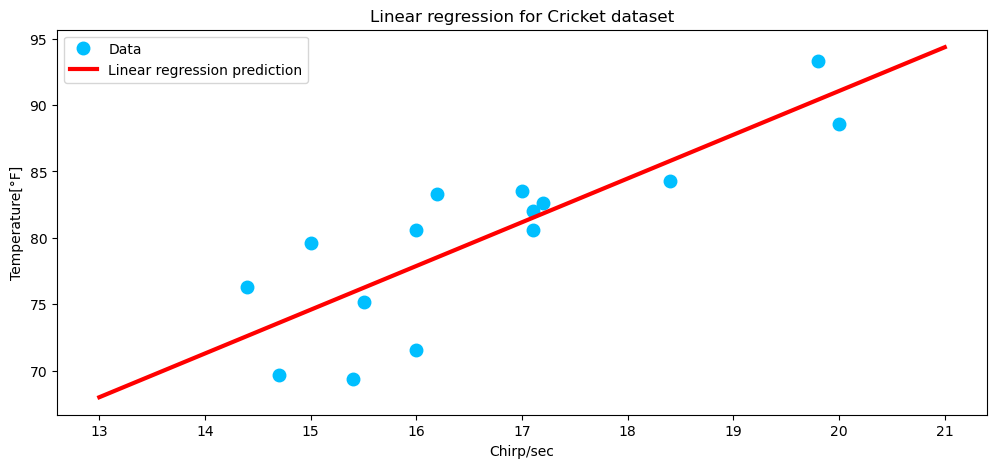

In [3]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (12, 5)

# query/prediccion
X_tilda_reg = np.vstack((np.linspace(13, 21, 9), np.ones(9)))

# plot 
plt.plot(X, Y, 'o', c='#00BFFF',ms=9, label='Data')
plt.plot(X_tilda_reg[0, :], w_opt.dot(X_tilda_reg), 'r', lw=3, label='Linear regression prediction')
plt.legend()
plt.xlabel('Chirp/sec')
plt.ylabel('Temperature[°F]')
plt.title('Linear regression for Cricket dataset')
plt.savefig("../img/optimisation_example_lr_crickets.pdf");

### 2. Logistic regression

In logistic regression, we aim to determine the function
\begin{align}
  f \colon \R^M &\to \R\nonumber\\
  x &\mapsto f(x)= \frac{1}{1 + e^{-\theta^\top x+b}},\quad \theta\in\R^M, b\in\R
\end{align}
conditional to the  observations $\mathcal{D} = \{(x_i,c_i)\}_{i=1}^N\subset \R^M \times \{0,1\}$.

The standard loss function for the classification problem is the cross entropy, given by:
\begin{align}
	J(\theta,b) &= \frac{1}{N} \sum_{i=1}^N \left( \log(1+e^{-\theta^\top x+b}) -y_i(-\theta^\top x+b)  \right)
\end{align}

In [4]:
# Generate Gaussian samples
np.random.seed(42)
n_samples = 200

mean0 = np.array([0, 0])
cov0 = np.array([[1.0, 0.3], [0.3, 1.0]])

mean1 = np.array([2, 2])
cov1 = np.array([[1.0, -0.4], [-0.4, 1.0]])

X0 = np.random.multivariate_normal(mean0, cov0, n_samples)
X1 = np.random.multivariate_normal(mean1, cov1, n_samples)

X = np.vstack((X0, X1))
y = np.hstack((np.zeros(n_samples), np.ones(n_samples)))

In [5]:
# Define loss and gradient
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def loss_and_grad(theta, b, X, y):
    N = X.shape[0]
    z = X @ theta + b
    p = sigmoid(z)
    # Loss
    J = (1 / N) * np.sum(np.log(1 + np.exp(-z)) - y * (-z))
    # Gradients
    grad_theta = (1 / N) * (X.T @ (p - y))
    grad_b = (1 / N) * np.sum(p - y)
    return J, grad_theta, grad_b

In [6]:
# Gradient descent optimization
theta = np.zeros(X.shape[1])
b = 0.0
lr = 0.1
max_iter = 1000
tol = 1e-6

for i in range(max_iter):
    J, grad_theta, grad_b = loss_and_grad(theta, b, X, y)
    theta_new = theta - lr * grad_theta
    b_new = b - lr * grad_b
    if np.linalg.norm(theta_new - theta) < tol:
        break
    theta, b = theta_new, b_new

print(f"Converged after {i+1} iterations")
print("θ =", theta)
print("b =", b)
print("Final loss =", J)

Converged after 1000 iterations
θ = [1.74808537 1.69393132]
b = -3.575514778570534
Final loss = 3.6069430694032674


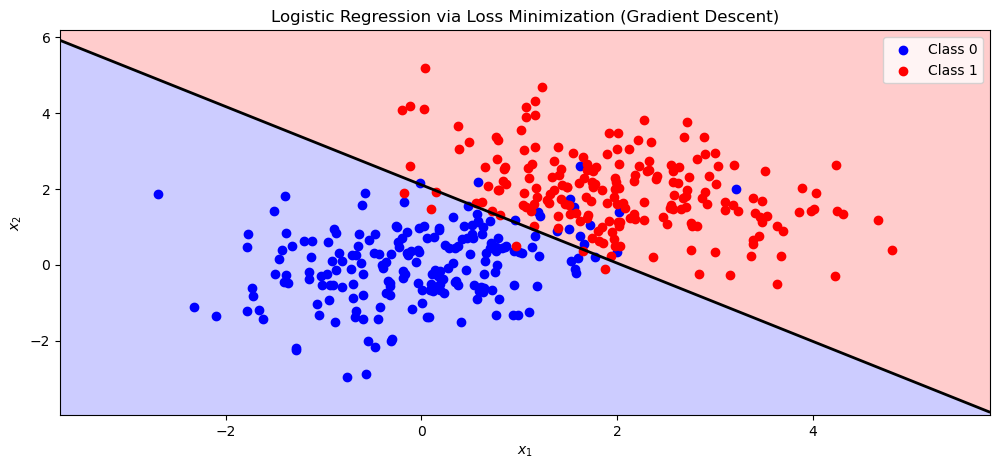

In [7]:
# Plot results
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))

Z = sigmoid(xx * theta[0] + yy * theta[1] + b)
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, levels=[0, 0.5, 1], alpha=0.2, colors=["blue", "red"])
plt.contour(xx, yy, Z, levels=[0.5], colors="k", linewidths=2)

plt.scatter(X0[:, 0], X0[:, 1], color="blue", label="Class 0")
plt.scatter(X1[:, 0], X1[:, 1], color="red", label="Class 1")

plt.title("Logistic Regression via Loss Minimization (Gradient Descent)")
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.legend()
plt.savefig("../img/optimisation_example_logreg.pdf");

### 3. Clustering (K-means)

Given N observations in $\R^m$, we aim to find cluster centres (or prototypes) $\mu = \mu_1,\mu_2,\ldots, \mu_K$ and _assignment variables_ $r = \{r_{ik}\}_{i,k=1}^{N,K}$, to minimise the following loss 
\begin{equation}
	J(\mu,r) = \sum_{i=1}^N\sum_{k=1}^K r_{ik} ||x_i-\mu_k||^2
\end{equation}

In [8]:
# Minimising J with a coordinate descent method
def kmeans(X, K=2, max_iter=100, tol=1e-6):
    N = X.shape[0]
    # Randomly initialize centroids (choose K random points)
    rng = np.random.default_rng(0)
    mu = X[rng.choice(N, K, replace=False)]

    for iteration in range(max_iter):
        # E-step: assign points to nearest centroid
        distances = np.linalg.norm(X[:, np.newaxis, :] - mu[np.newaxis, :, :], axis=2)
        r = np.argmin(distances, axis=1)  # assignments

        # M-step: update centroids
        mu_new = np.array([X[r == k].mean(axis=0) for k in range(K)])
        
        # Check convergence
        shift = np.linalg.norm(mu_new - mu)
        if shift < tol:
            break
        mu = mu_new

    return mu, r

# Run K-means
K = 2
mu, r = kmeans(X, K)

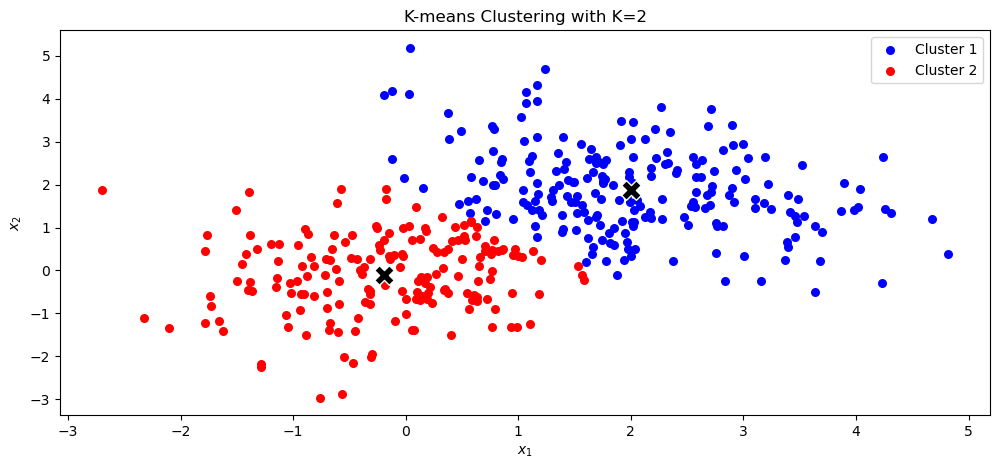

In [9]:
colors = ["blue", "red", "green", "orange", "purple"]

for k in range(K):
    plt.scatter(X[r == k, 0], X[r == k, 1], s=30, color=colors[k], label=f"Cluster {k+1}")
    plt.scatter(mu[k, 0], mu[k, 1], color="black", marker="X", s=200, edgecolors="white")

plt.title(f"K-means Clustering with K={K}")
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.legend()
plt.savefig("../img/optimisation_example_kmeans.pdf");